In [1]:
# load libraries 
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [15]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


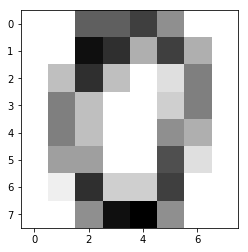

In [55]:
# Display digit 980
plt.imshow(digits.images[980], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [56]:
digits.images[980]

array([[  0.,   0.,  10.,  10.,  12.,   7.,   0.,   0.],
       [  0.,   0.,  15.,  13.,   5.,  12.,   5.,   0.],
       [  0.,   4.,  13.,   4.,   0.,   2.,   8.,   0.],
       [  0.,   8.,   4.,   0.,   0.,   3.,   8.,   0.],
       [  0.,   8.,   4.,   0.,   0.,   7.,   5.,   0.],
       [  0.,   6.,   6.,   0.,   0.,  11.,   2.,   0.],
       [  0.,   1.,  13.,   3.,   3.,  12.,   0.,   0.],
       [  0.,   0.,   7.,  15.,  16.,   7.,   0.,   0.]])

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [23]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [24]:
# Create a k-NN classifier with 7 neighbors: knn
knn=KNeighborsClassifier(n_neighbors=7)

In [25]:
# Fit the classifier to the training data
# fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [26]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.983333333333


Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [57]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [58]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    print(i)
    print(k)

0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19


In [59]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn=KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

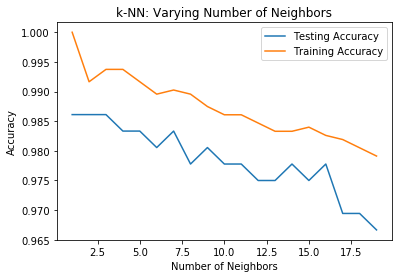

In [60]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()